# Load Image (Start your project)
Get Off to a Running Start with the Necessary Imports Below

In [1]:
#un comment the following lines to use sci-kit tips on the exercise (ie, shortcuts need to be taken):
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py

#from skimage import data
#from skimage.filters import threshold_otsu
#from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, watershed
from skimage.feature import peak_local_max
from skimage.color import label2rgb
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import modules.oiplib as ip
import math

from scipy import ndimage as ndi

%matplotlib inline

#This line is specific for mac users with retina display
%config InlineBackend.figure_format = 'retina'

#from ipywidgets import interact, interactive, fixed, interact_manual
#from ipywidgets import widgets



In [2]:
from skimage.measure import label

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1201a6e90>)

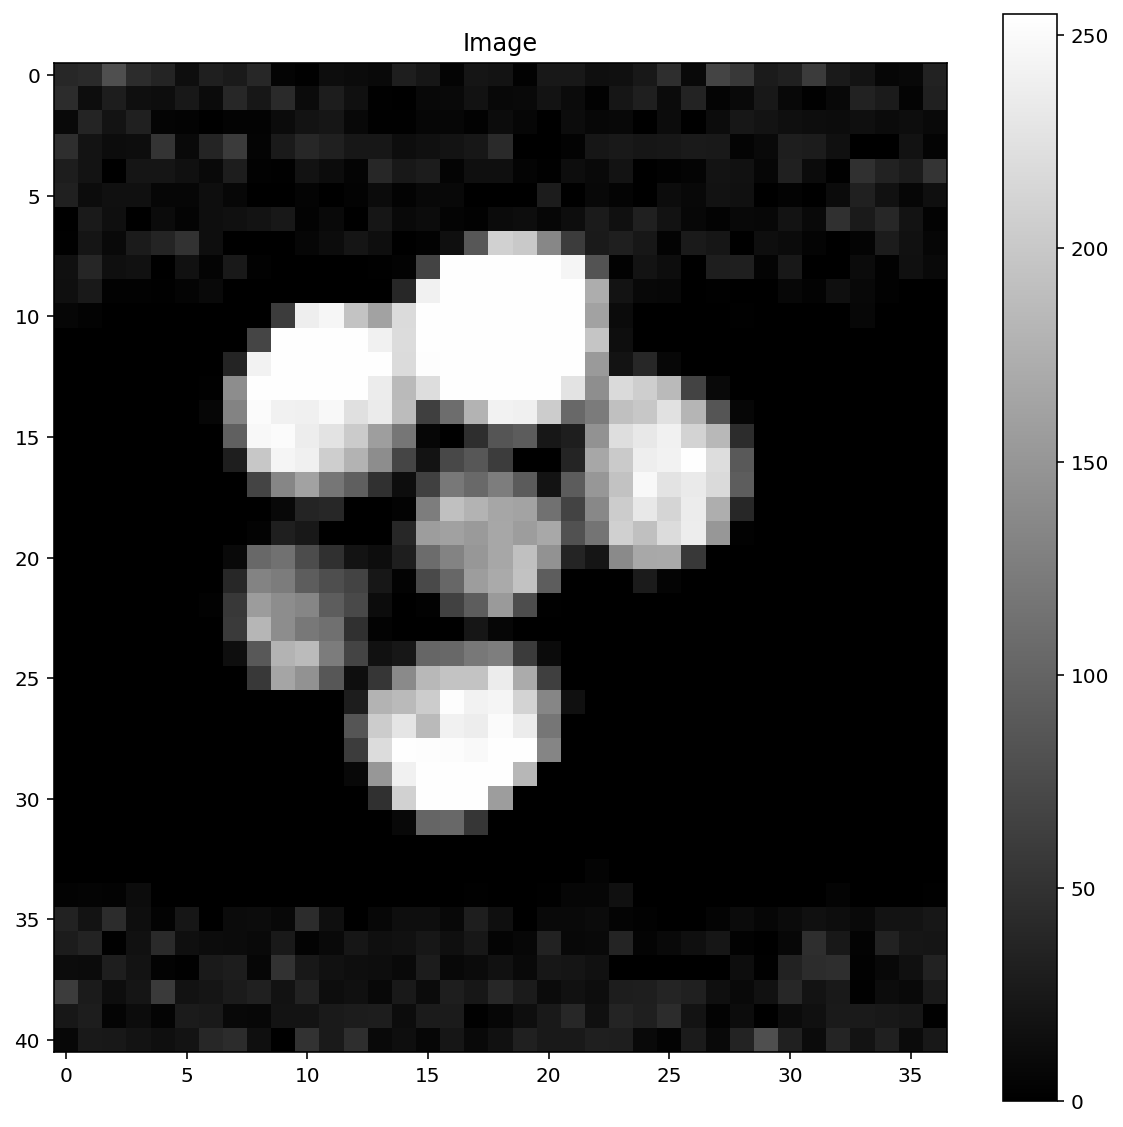

In [3]:
imgurl = '../images/cluster1.png'
imgurl2 = '../images/cluster2.png'
img = ip.loadImage(imgurl)
img = ip.rgb2GrayLuminosity(img)
img2 = ip.loadImage(imgurl2)
img2 = ip.rgb2GrayLuminosity(img2)
ip.showImage(img, figsize=(10,10))

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x108d3f890>)

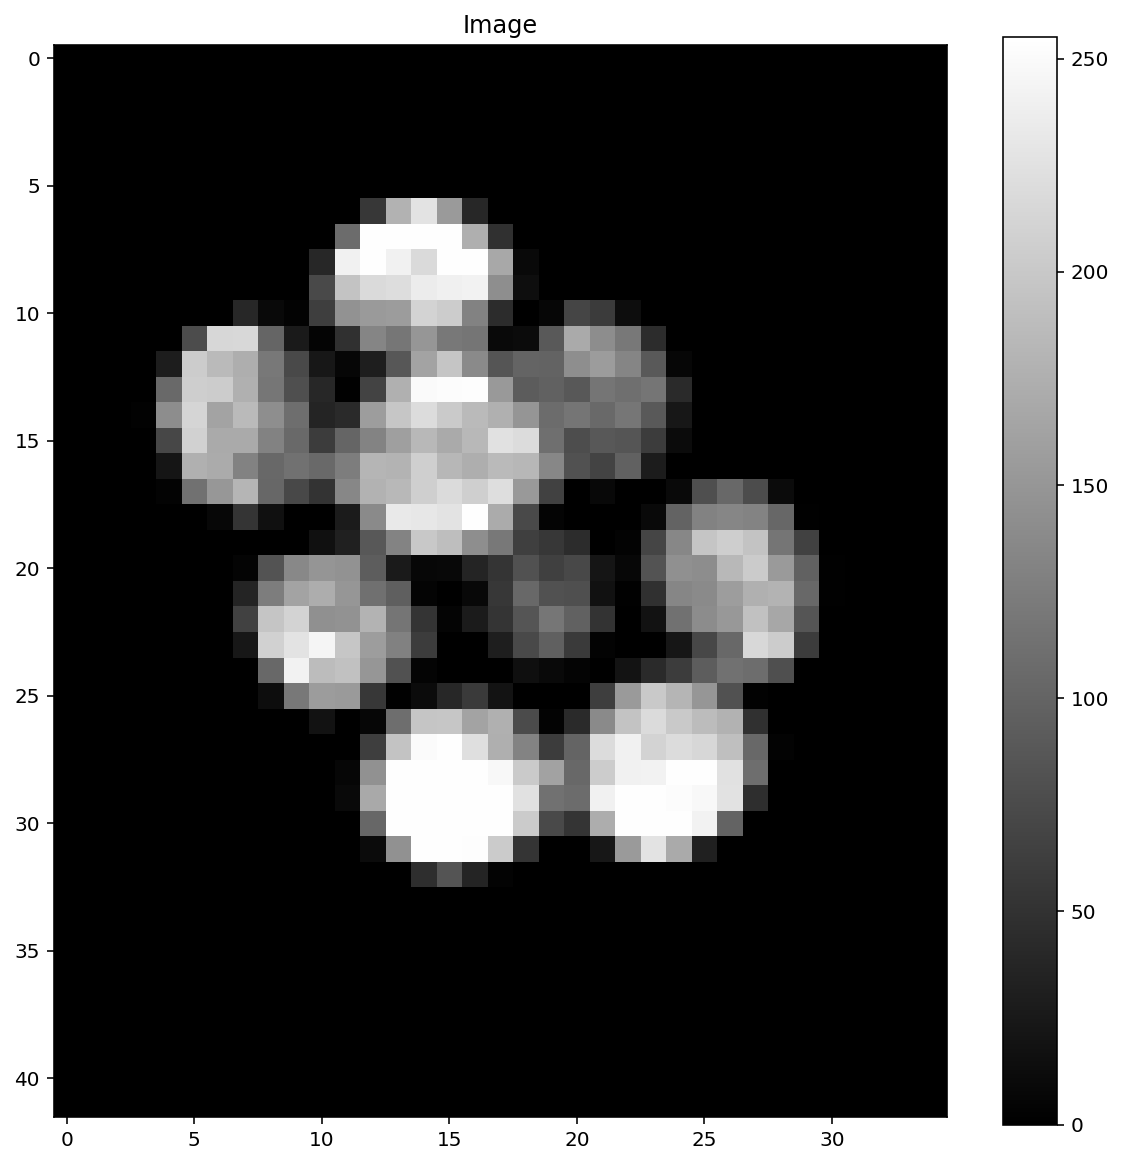

In [4]:
ip.showImage(img2,figsize=(10,10))

In [5]:
cont = ip.auto_contrast256(img)


(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109a4c5d0>)

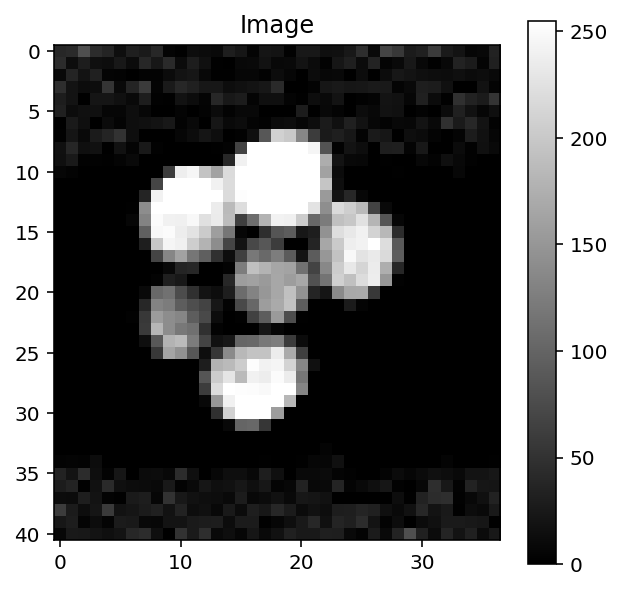

In [6]:
ip.showImage(cont)

In [7]:
fil, Hx, Hy, SUM = ip.create_gaussian_filter(3,1)

In [8]:
blur = ip.filter_image(cont,fil)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109a55190>)

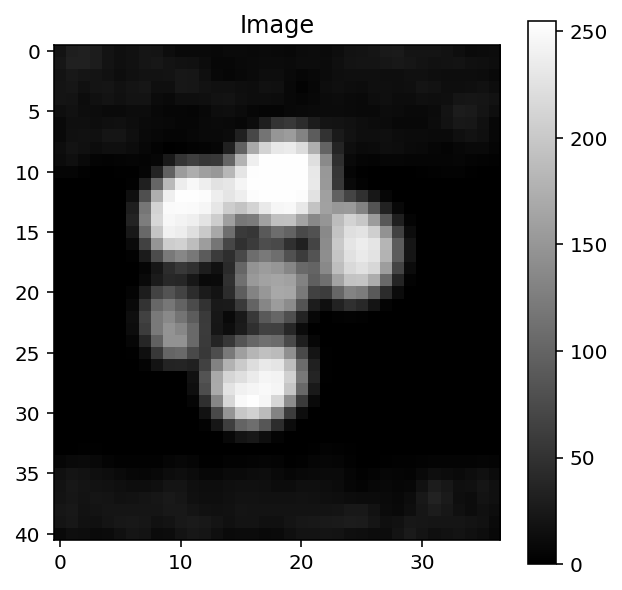

In [9]:
ip.showImage(blur)

In [10]:
edge,phi,x,y = ip.detect_edges(blur)
#edge = ip.auto_contrast256(edge)

In [11]:
edge2, p2, x2, y2 = ip.detect_edges(blur,'Isobel')

In [12]:
edge3,phi,x,y = ip.detect_edges(blur, 'Roberts')
#edge = ip.auto_contrast256(edge)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ff78f90>)

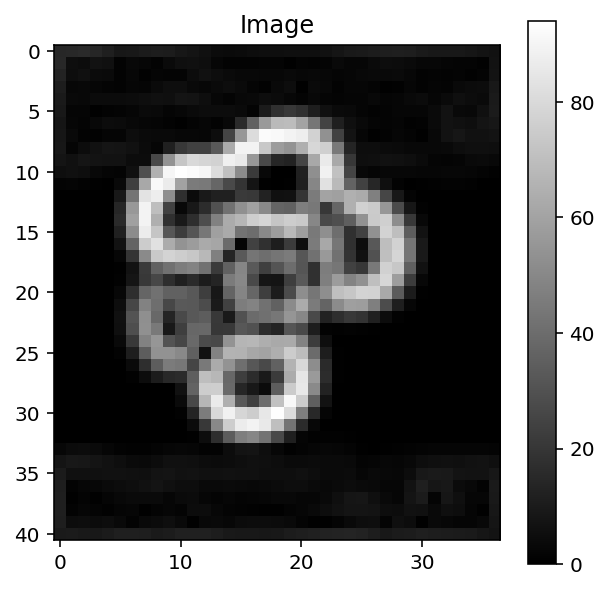

In [13]:
ip.showImage(edge, vmax = np.max(edge))

In [14]:
ethresh = ip.threshold_binary2(edge, 30)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1201f1a50>)

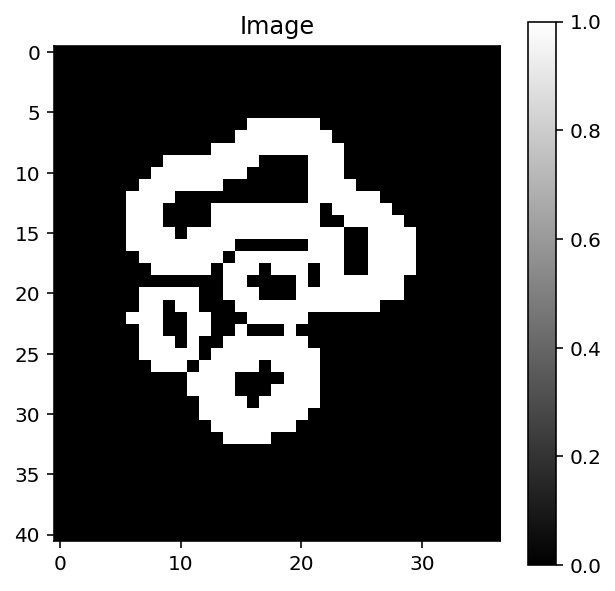

In [15]:
ip.showImage(ethresh, vmax = 1)

In [16]:
ethin = ip.Thinning(ethresh)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1200fec50>)

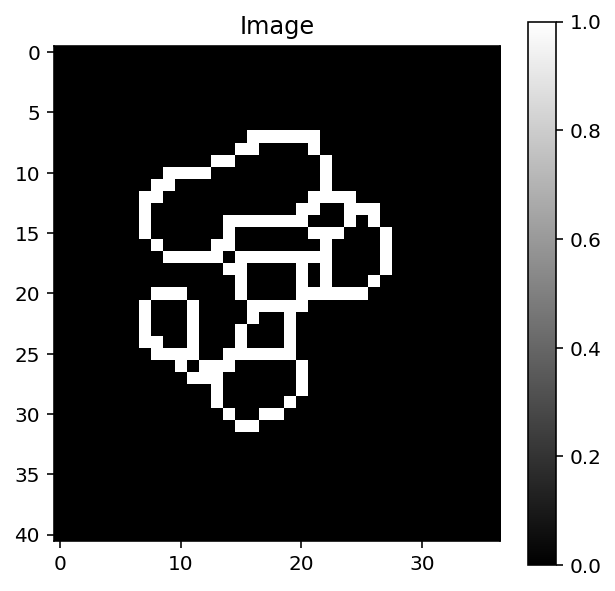

In [17]:
ip.showImage(ethin, vmax = 1)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120279610>)

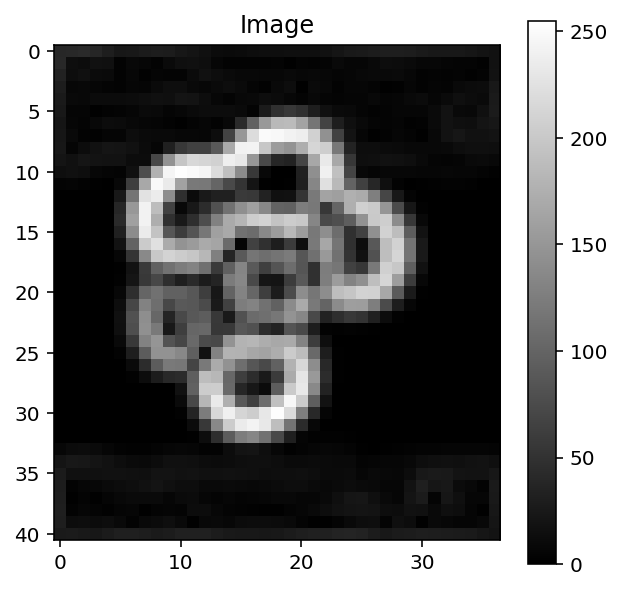

In [18]:
edge2 = ip.auto_contrast256(edge2)
ip.showImage(edge2)

In [19]:
lapsharp,edgeslap = ip.laplace_sharpen(blur, Filter='L4', Threshold=True, TVal= .01)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1210eb790>)

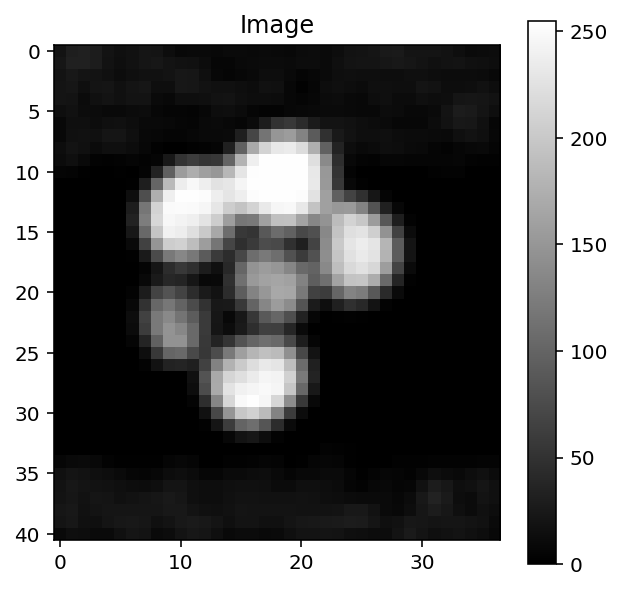

In [20]:
ip.showImage(lapsharp)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12135ccd0>)

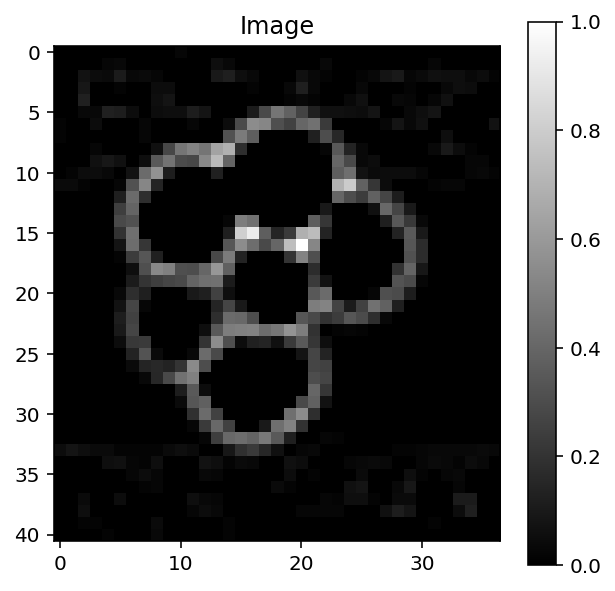

In [21]:
ip.showImage(edgeslap, vmax= np.max(edgeslap))

In [22]:
thresh = ip.threshold_binary2(edgeslap,.15)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fc86890>)

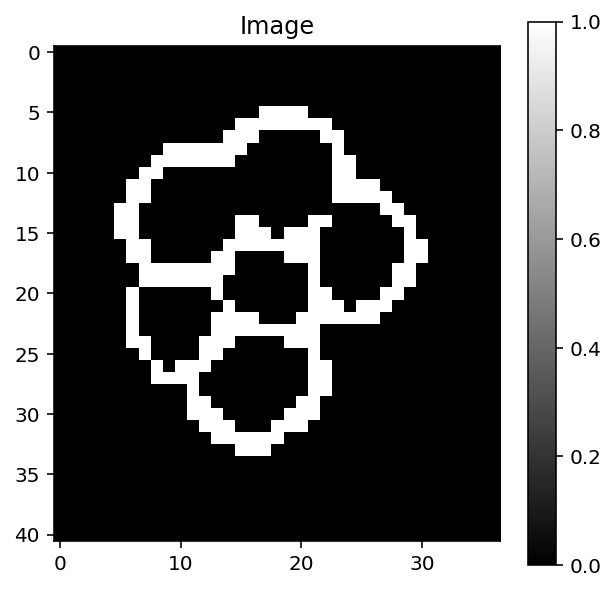

In [23]:
ip.showImage(thresh, vmax = 1)

In [24]:
closeskel = ip.img_close(thresh,ip.N4)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1200e6190>)

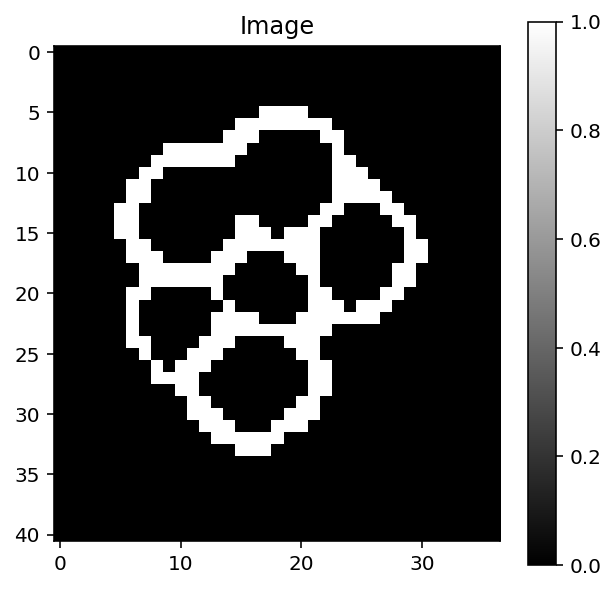

In [25]:
ip.showImage(closeskel, vmax = 1)

In [26]:
testskel = ip.img_dilate(thresh,ip.N4)
testskel2 = ip.img_dilate(thresh,ip.N8)
testskel3 = ip.img_dilate(thresh,ip.SmallDisk)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12245c410>)

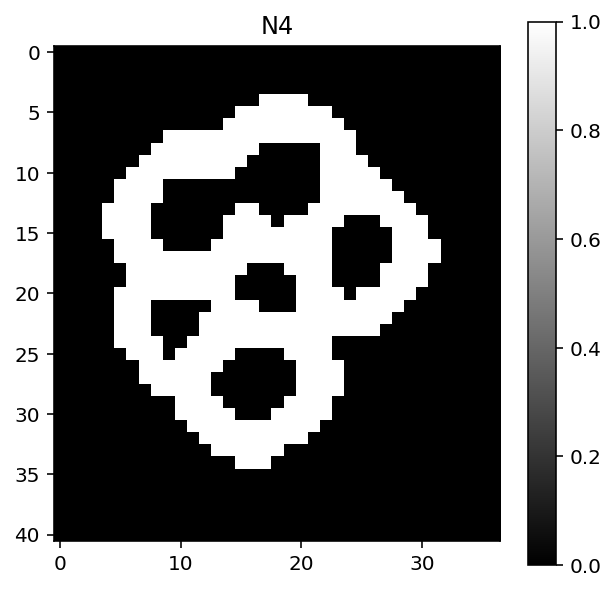

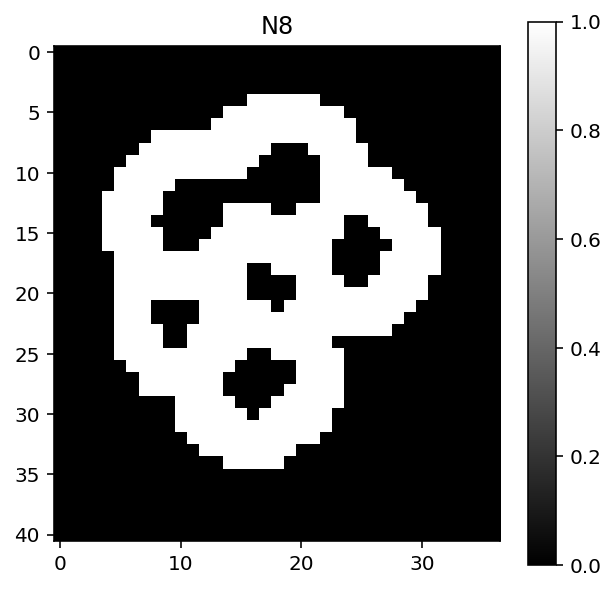

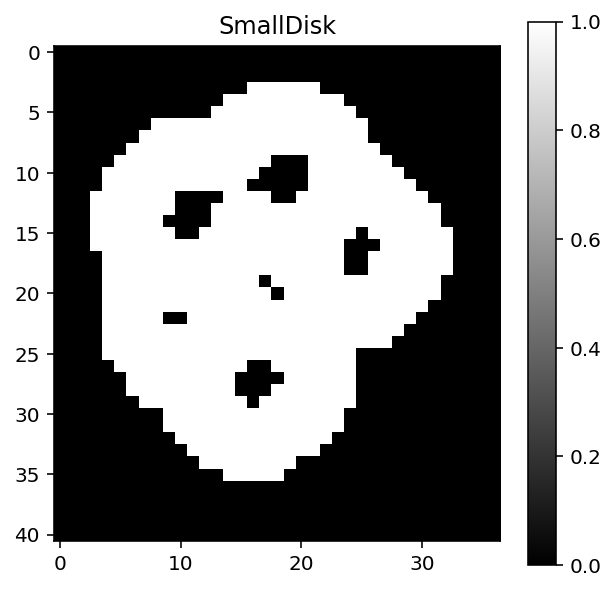

In [27]:
ip.showImage(testskel, title="N4", vmax = 1)
ip.showImage(testskel2, title="N8", vmax = 1)
ip.showImage(testskel3,  title="SmallDisk",vmax = 1)

In [28]:
skel2 = ip.Thinning(closeskel)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x122569c90>)

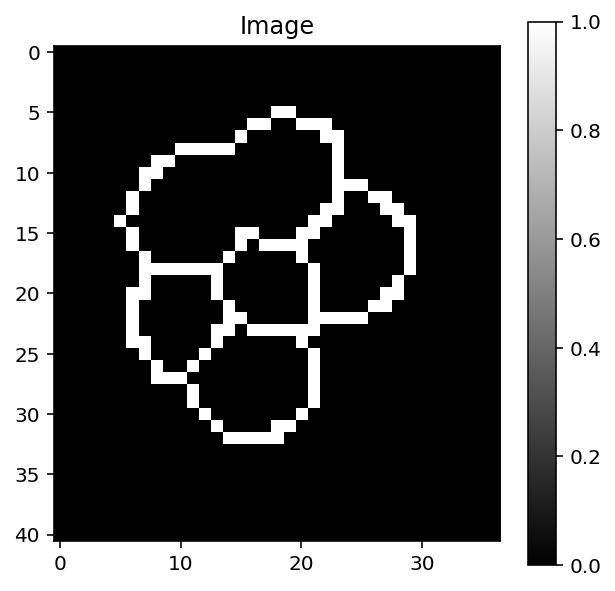

In [29]:
ip.showImage(skel2, vmax = 1)

In [30]:
skel = ip.Thinning(thresh)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120309250>)

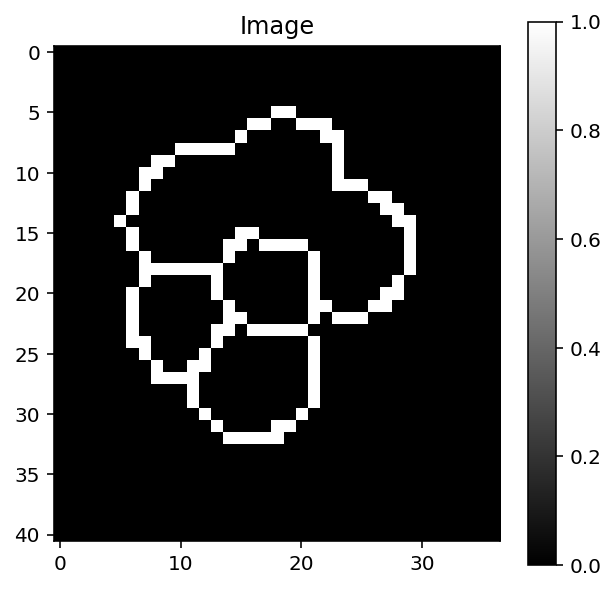

In [31]:
ip.showImage(skel, vmax = 1)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123afbe10>)

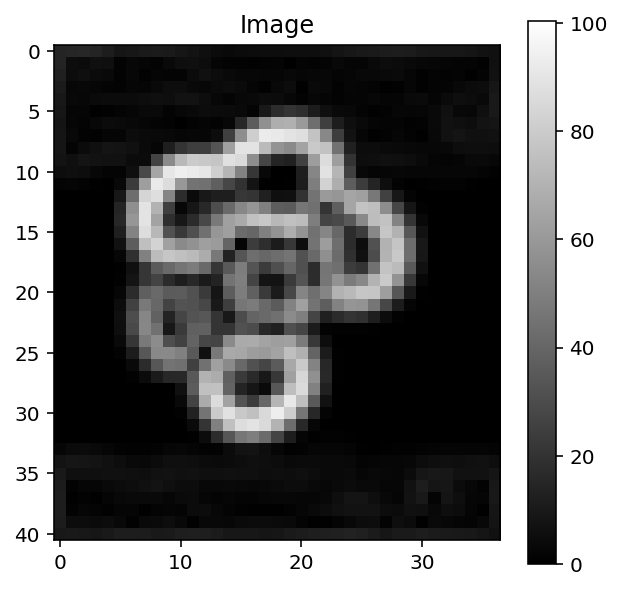

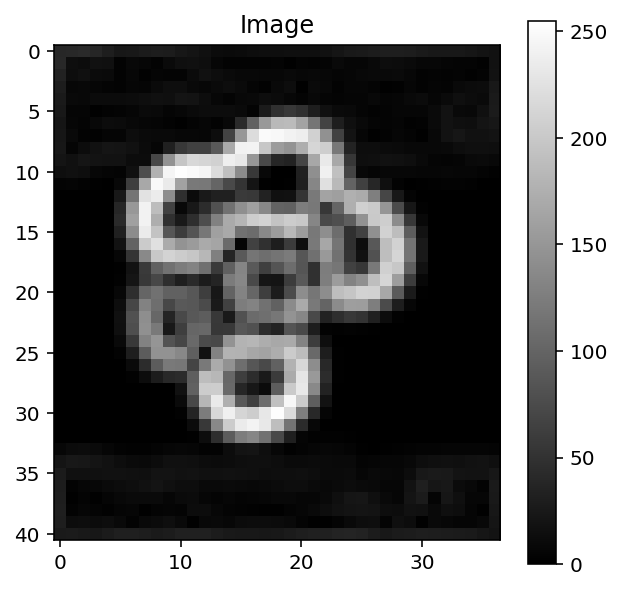

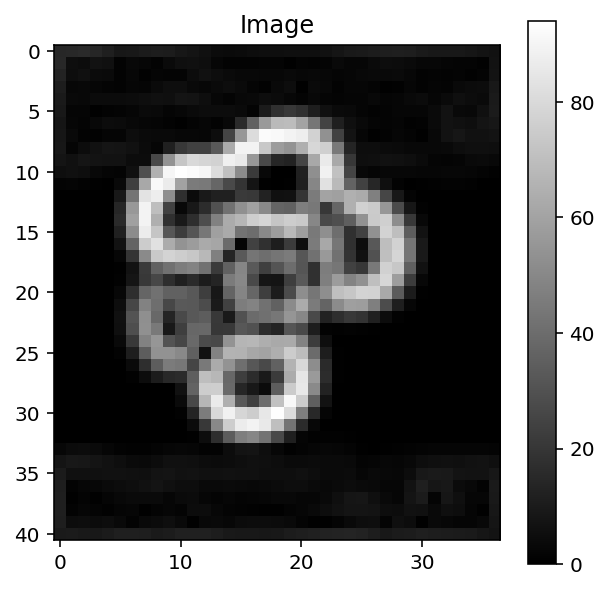

In [32]:
ip.showImage(edge, vmax = np.max(edge3))
ip.showImage(edge2)
ip.showImage(edge, vmax = np.max(edge))

In [33]:
#pick skel2 because it is most fidel contour map 

In [34]:
def RegionLabelling(I):
    ## include edge removal
    label = 2
    u = I.shape[0]
    v = I.shape[1]
    img = np.copy(I).astype(np.int)
    for i in range(u):
        for j in range(v):
            if img[i,j] == 1:
                S = []
                S.append([i,j])
                ubound = img.shape[0]
                vbound = img.shape[1]
                while len(S) != 0:
                    a = S.pop(0)
                    x = a[0]
                    y = a[1]
                    if x < ubound and y < vbound and img[x,y] == 1:
                        img[x,y] = label
                        S.append([x+1, y])
                        S.append([x, y+1])
                        S.append([x, y-1])
                        S.append([x-1, y])         
                label = label + 1
    img[img == 2] = 0      
    return img

In [35]:
segments = RegionLabelling((1-skel2))

In [36]:
segments

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123d70750>)

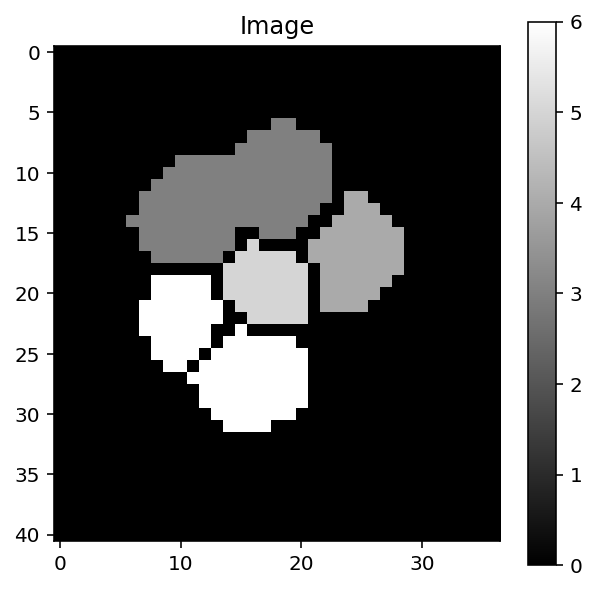

In [37]:
ip.showImage(segments, vmax = 6)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12502a210>)

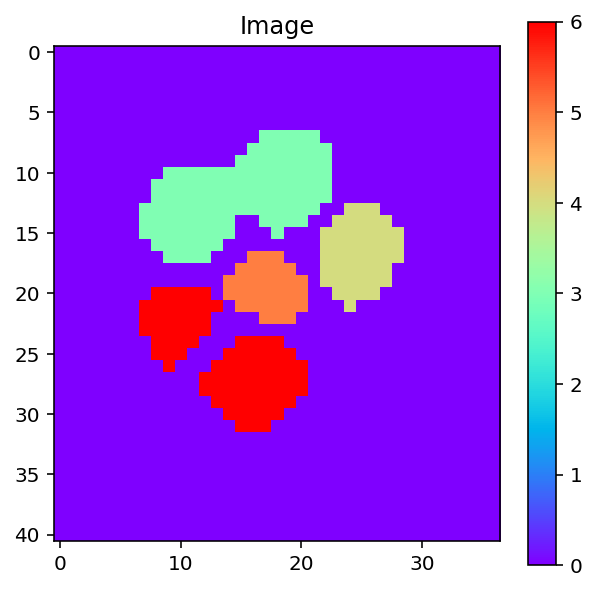

In [66]:
ip.showImage(tttt, vmax = 6, cmap = 'rainbow')

In [39]:
tttt = RegionLabelling(1-closeskel)

In [67]:
np.unique(tttt)

array([0, 3, 4, 5, 6, 7])

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fc18cd0>)

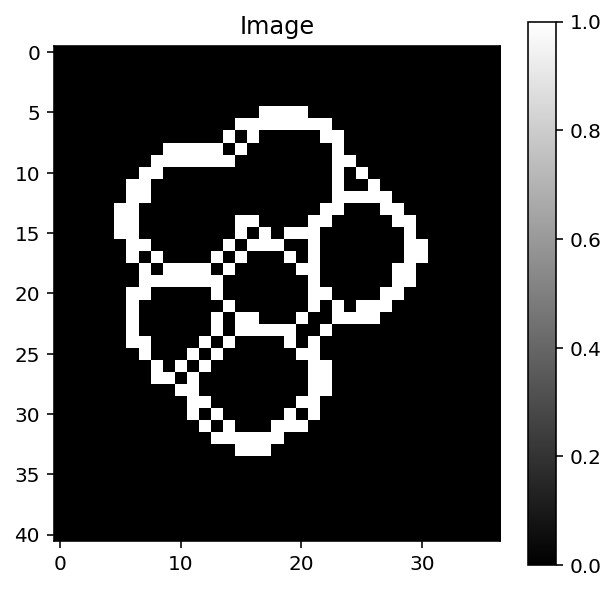

In [41]:
ip.showImage(tttt2, vmax = 1)

In [42]:
#count # of pixels for each label
b = []
for i in a[1:]:
    b.append(np.count_nonzero(segments[segments == i]))

b

NameError: name 'a' is not defined

In [43]:
blank = np.zeros(tttt.shape)

labeltobewatershed = 3

i = labeltobewatershed

mask = tttt == i + blank

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123c73810>)

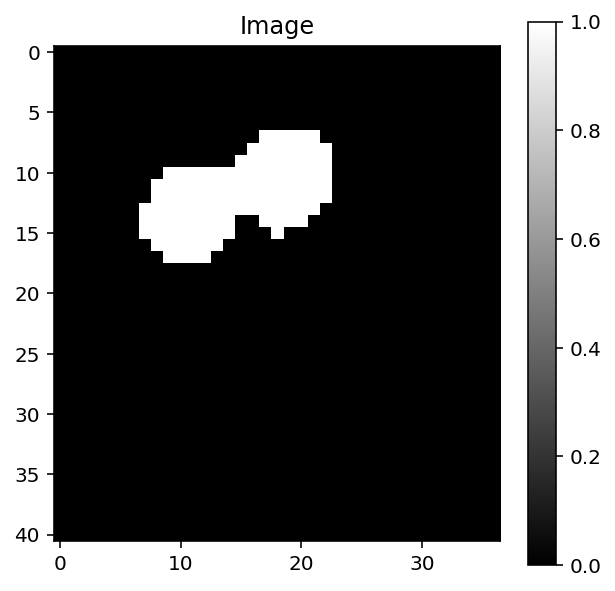

In [44]:
ip.showImage(mask, vmax = 1)

In [46]:
distance = ndi.distance_transform_edt(mask)

In [47]:
local_maxi = peak_local_max(distance, indices=False, footprint = np.ones((3,3)),labels=mask)

In [59]:
markers = ndi.label(local_maxi)[0]

In [62]:
np.unique(markers)

array([0, 1, 2], dtype=int32)

In [65]:
local_maxi

array([False,  True])

In [49]:
labels = watershed(-distance,markers, mask=mask)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x122535290>)

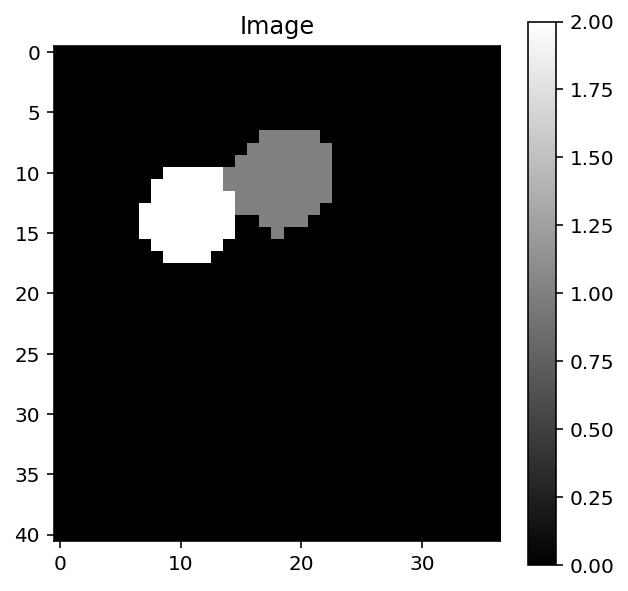

In [50]:
ip.showImage(labels, vmax = 2)

In [51]:
np.unique(tttt)

array([0, 3, 4, 5, 6, 7])

In [52]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [53]:
blank = np.zeros(tttt.shape)

labeltobewatershed = 3

i = labeltobewatershed

mask = tttt == i + blank


new = np.zeros(tttt.shape)
elementstooffset = tttt > labeltobewatershed
offset = np.copy(labels)
offset[labels!=0] = labels[labels!=0] + 2
addingfactor = len(np.unique(labels)) - 2
new[elementstooffset] = tttt[elementstooffset] + addingfactor
new = new + offset

#for this, 2 remains the "background" color

In [54]:
new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
right = (labels == 0) 

In [56]:
new[right] = tttt[right] + 2

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x123a60a50>)

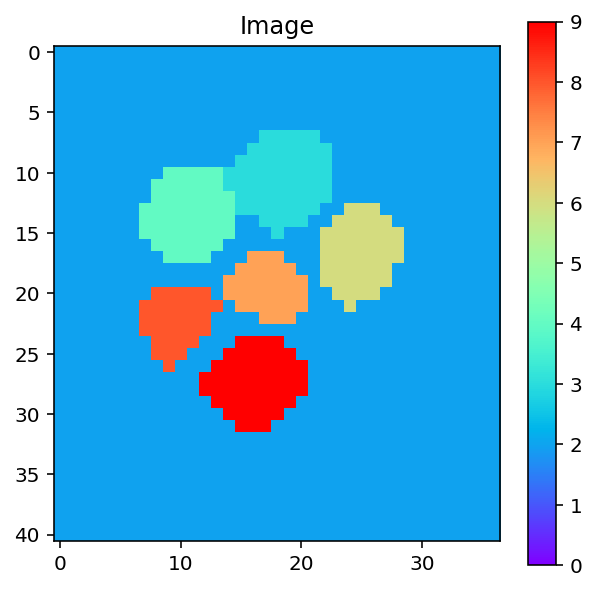

In [57]:
ip.showImage(new, vmax = 9, cmap ='rainbow')

In [58]:
np.unique(new)

array([2., 3., 4., 6., 7., 8., 9.])

In [ ]:
tttt

In [ ]:
testimg = ip.loadImage('../images/test.png')

In [ ]:
test = 1 - ip.rgb2GrayAverage(testimg)

In [ ]:
tt = ip.threshold_binary2(test,100)

In [ ]:
ip.showImage(tt,vmax = 1)